# Proje Girişi

Bu projedeki amacımız, kapsamlı bir ruh sağlığı anketinden elde edilen verileri kullanarak bireylerin depresyon yaşamasına neden olabilecek temel faktörleri keşfetmek ve analiz etmektir.  
Bu doğrultuda, çeşitli sınıflandırma algoritmalarından ve veri analiz tekniklerinden yararlanarak anlamlı desenleri ortaya çıkarmayı ve depresyonun olası nedenlerini tahmin edebilecek modeller geliştirmeyi hedefliyoruz.


<img src='https://sitescdn.wearevennture.co.uk/public/spencer-clarke-group/mediahub/degree--1--1d9c203506ce4c92ba281a6acee4aa19.jpg' width=500>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('train.csv')

## Sütun Açıklamaları

- **id**: Her bireye atanmış benzersiz kimlik numarası.
- **Name**: Katılımcının adı.
- **Gender**: Katılımcının cinsiyeti (Kadın/Erkek).
- **Age**: Katılımcının yaşı.
- **City**: Katılımcının yaşadığı şehir.
- **Working Professional or Student**: Katılımcının çalışıyor mu yoksa öğrenci mi olduğu.
- **Profession**: Katılımcının mesleği.
- **Academic Pressure**: Akademik baskı düzeyi (varsa).
- **Work Pressure**: İş baskısı düzeyi (varsa).
- **CGPA**: Not ortalaması (varsa).
- **Study Satisfaction**: Ders çalışma memnuniyeti (varsa).
- **Job Satisfaction**: İş memnuniyeti (varsa).
- **Sleep Duration**: Günlük ortalama uyku süresi.
- **Dietary Habits**: Beslenme alışkanlıkları (Sağlıklı/Orta/Sağlıksız).
- **Degree**: Mezun olunan veya devam edilen bölüm/derece.
- **Have you ever had suicidal thoughts ?**: Daha önce intihar düşüncesi olup olmadığı (Evet/Hayır).
- **Work/Study Hours**: Günlük ortalama çalışma veya ders saatleri.
- **Financial Stress**: Finansal stres düzeyi.
- **Family History of Mental Illness**: Ailede ruhsal hastalık öyküsü olup olmadığı (Evet/Hayır).
- **Depression**: Katılımcının depresyonda olup olmadığı (0: Hayır, 1: Evet) — **Hedef değişkeni**.


In [6]:
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


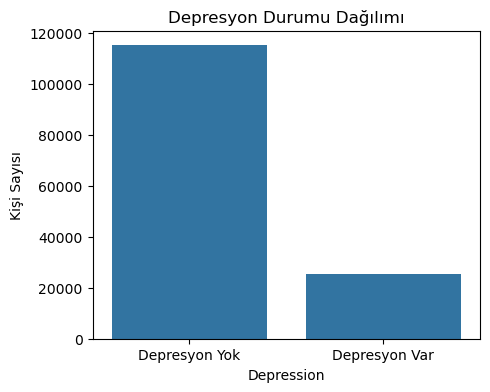

In [7]:
plt.figure(figsize=(5,4))
depression_counts = df['Depression'].value_counts()
sns.barplot(x=depression_counts.index, y=depression_counts.values)
plt.xticks([0,1], ['Depresyon Yok', 'Depresyon Var'])
plt.ylabel('Kişi Sayısı')
plt.title('Depresyon Durumu Dağılımı')
plt.show()

In [8]:
df.shape

(140700, 20)

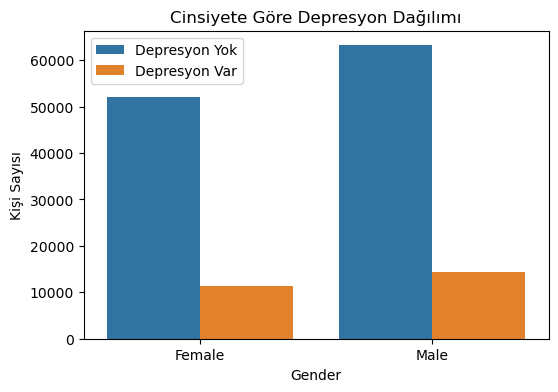

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', hue='Depression')
plt.xticks(rotation=0)
plt.legend(labels=['Depresyon Yok', 'Depresyon Var'])
plt.title('Cinsiyete Göre Depresyon Dağılımı')
plt.ylabel('Kişi Sayısı')
plt.show()


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [11]:
df['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

## Not: Veri Setimiz Anket Verilerinden olustugu icin bazi gercek disi mantiksiz  degerler olabilir bunlari ilerleyen adimlarda cesitli methodlarla kurtulacacagiz

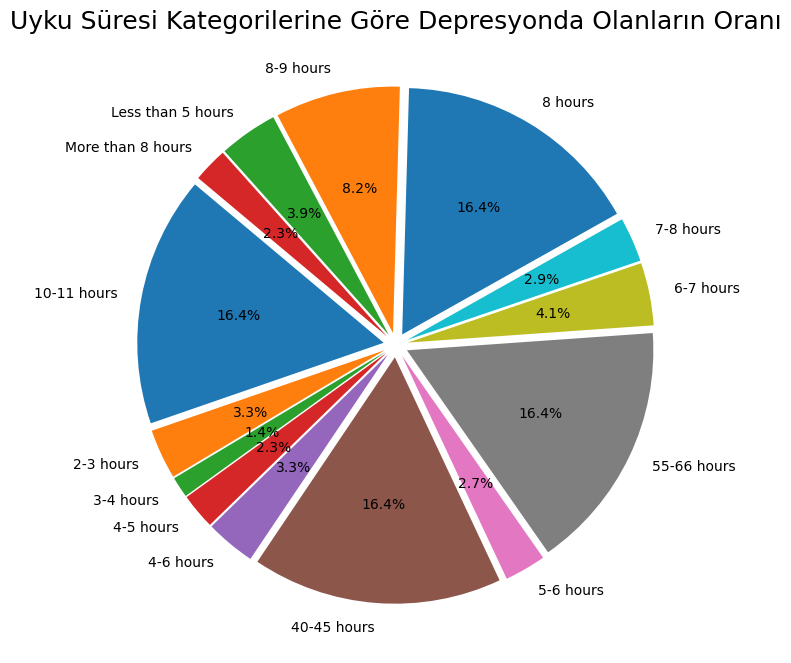

In [13]:
# Uyku süresi ve depresyon olanların sayısını grup halinde alıyoruz
sleep_dep = df[df['Depression']==1]['Sleep Duration'].value_counts()
sleep_total = df['Sleep Duration'].value_counts().loc[sleep_dep.index]

# Her bir uyku süresi kategorisinde depresyonda olanların oranı
sleep_dep_ratio = (sleep_dep / sleep_total * 100).sort_index()

plt.figure(figsize=(10,8))
plt.pie(sleep_dep_ratio, labels=sleep_dep_ratio.index, autopct='%1.1f%%', startangle=140, explode=[0.05]*len(sleep_dep_ratio))
plt.title('Uyku Süresi Kategorilerine Göre Depresyonda Olanların Oranı', fontsize=18)
plt.show()

In [14]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


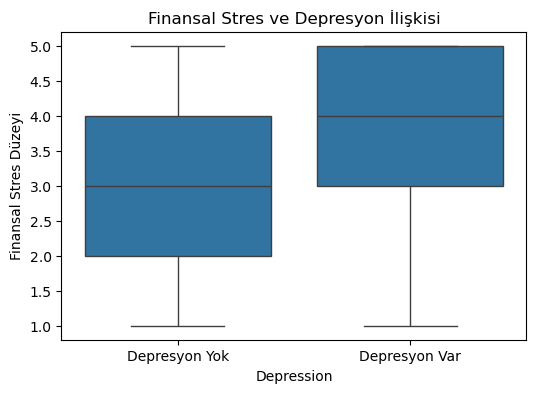

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Depression', y='Financial Stress')
plt.xticks([0,1], ['Depresyon Yok', 'Depresyon Var'])
plt.title('Finansal Stres ve Depresyon İlişkisi')
plt.ylabel('Finansal Stres Düzeyi')
plt.show()

In [16]:
df.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [17]:
df.shape

(140700, 20)

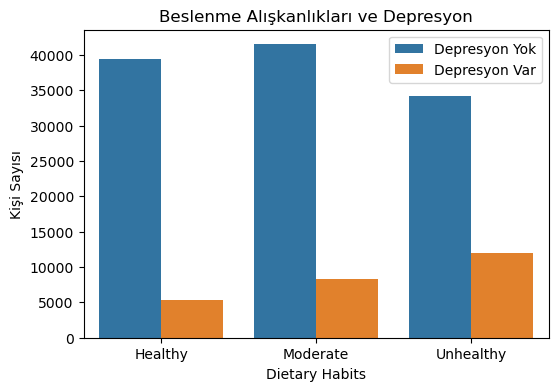

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Dietary Habits', hue='Depression', order=['Healthy','Moderate','Unhealthy'])
plt.title('Beslenme Alışkanlıkları ve Depresyon')
plt.ylabel('Kişi Sayısı')
plt.legend(labels=['Depresyon Yok', 'Depresyon Var'])
plt.show()

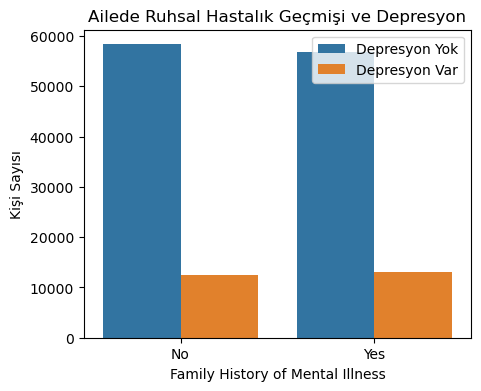

In [19]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Family History of Mental Illness', hue='Depression')
plt.title('Ailede Ruhsal Hastalık Geçmişi ve Depresyon')
plt.ylabel('Kişi Sayısı')
plt.legend(labels=['Depresyon Yok', 'Depresyon Var'])
plt.show()

In [20]:
df.corr(numeric_only=True)

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
id,1.000000,0.001850,0.005597,0.003086,-0.011869,0.007824,0.002774,0.002359,-0.000340,0.003944
Age,0.001850,1.000000,-0.075956,-0.098924,0.005129,0.008862,0.030793,-0.118356,-0.083589,-0.564671
Academic Pressure,0.005597,-0.075956,1.000000,NaN,-0.025195,-0.112228,-1.000000,0.095650,0.152105,0.475037
Work Pressure,0.003086,-0.098924,NaN,1.000000,NaN,NaN,-0.036958,-0.002808,0.024412,0.216634
CGPA,-0.011869,0.005129,-0.025195,NaN,1.000000,-0.047078,1.000000,0.002875,0.006398,0.021729
Study Satisfaction,0.007824,0.008862,-0.112228,NaN,-0.047078,1.000000,-1.000000,-0.036934,-0.065001,-0.168014
Job Satisfaction,0.002774,0.030793,-1.000000,-0.036958,1.000000,-1.000000,1.000000,-0.029227,-0.029160,-0.168543
Work/Study Hours,0.002359,-0.118356,0.095650,-0.002808,0.002875,-0.036934,-0.029227,1.000000,0.036134,0.191746
Financial Stress,-0.000340,-0.083589,0.152105,0.024412,0.006398,-0.065001,-0.029160,0.036134,1.000000,0.227237
Depression,0.003944,-0.564671,0.475037,0.216634,0.021729,-0.168014,-0.168543,0.191746,0.227237,1.000000


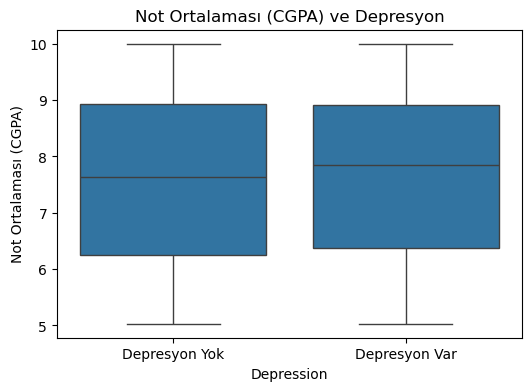

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Depression', y='CGPA')
plt.xticks([0,1], ['Depresyon Yok', 'Depresyon Var'])
plt.title('Not Ortalaması (CGPA) ve Depresyon')
plt.ylabel('Not Ortalaması (CGPA)')
plt.show()


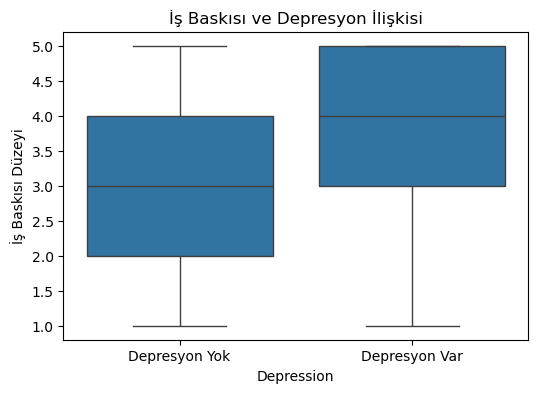

In [23]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Depression', y='Work Pressure')
plt.xticks([0,1], ['Depresyon Yok', 'Depresyon Var'])
plt.title('İş Baskısı ve Depresyon İlişkisi')
plt.ylabel('İş Baskısı Düzeyi')
plt.show()

# Not: simdi cok fazla nan deger iceren stunlardan kurtulacagiz cunku verinini %80 bos bizim bunlari doldurmamizin cok da degerli oldugunu dusunmuyorum

In [27]:
df.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [30]:
df = df.drop(['Academic Pressure', 'CGPA', 'Study Satisfaction'], axis=1)

In [31]:
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,NaN,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [35]:
df.isnull().sum()

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               36630
Work Pressure                            27918
Job Satisfaction                         27910
Sleep Duration                               0
Dietary Habits                               4
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             4
Family History of Mental Illness             0
Depression                                   0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 17 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Work Pressure                          112782 non-null  float64
 8   Job Satisfaction                       112790 non-null  float64
 9   Sleep Duration                         140700 non-null  object 
 10  Dietary Habits                         140696 non-null  

In [42]:
pd.set_option('display.max_columns',300)
pd.set_option('display.max_rows',300)

In [43]:
df.sample()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
118640,118640,Sanket,Male,18.0,Vadodara,Working Professional,NaN,1.0,4.0,Less than 5 hours,Moderate,Class 12,No,2.0,2.0,No,0


In [45]:
df['Profession'].value_counts()

Profession
Teacher                   24906
Content Writer             7814
Architect                  4370
Consultant                 4229
HR Manager                 4022
Pharmacist                 3893
Doctor                     3255
Business Analyst           3161
Entrepreneur               2968
Chemist                    2967
Chef                       2862
Educational Consultant     2852
Data Scientist             2390
Researcher                 2328
Lawyer                     2212
Customer Support           2055
Marketing Manager          1976
Pilot                      1913
Travel Consultant          1860
Plumber                    1748
Sales Executive            1739
Manager                    1737
Judge                      1712
Electrician                1582
Financial Analyst          1574
Software Engineer          1510
Civil Engineer             1470
UX/UI Designer             1452
Digital Marketer           1372
Accountant                 1339
Finanancial Analyst        13

In [47]:
df['Profession']=df['Profession'].fillna(df['Profession'].mode()[0])

In [50]:
df['Work Pressure'].value_counts()

Work Pressure
2.0    24373
4.0    22512
5.0    22436
3.0    21899
1.0    21562
Name: count, dtype: int64

In [51]:
df['Work Pressure']=df['Work Pressure'].fillna(df['Work Pressure'].mode()[0])

In [54]:
df['Job Satisfaction'].value_counts()

Job Satisfaction
2.0    24783
5.0    22812
1.0    22324
3.0    21951
4.0    20920
Name: count, dtype: int64

In [61]:
df['Job Satisfaction']=df['Job Satisfaction'].fillna(df['Job Satisfaction'].mode()[0])

In [64]:
df['Dietary Habits']=df['Dietary Habits'].fillna(df['Dietary Habits'].mode()[0])

In [67]:
df['Degree']=df['Degree'].fillna(df['Degree'].mode()[0])

In [72]:
df['Financial Stress']=df['Financial Stress'].fillna(df['Financial Stress'].mode()[0])

In [74]:
df.isnull().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [76]:
df['Dietary Habits'].value_counts()

Dietary Habits
Moderate             49709
Unhealthy            46227
Healthy              44741
Yes                      2
No                       2
More Healthy             2
No Healthy               1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
1.0                      1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64

## "Dietary Habits" Sütunu Temizliği

Bu adımda, "Dietary Habits" sütununda çok sayıda yanlış, tutarsız veya alakasız veri olduğu tespit edilmiştir.  
Özgün olarak sadece üç ana kategori olması gerekir: **Healthy**, **Moderate** ve **Unhealthy**.  
Fakat veri setinde "Yes", "No", "More Healthy", "Less Healthy", "Class 12", "Male", "Pratham" gibi alakasız veya yanlışlıkla girilmiş değerler de bulunuyor.

Aşağıdaki kod ile:
- "healthy" ifadesini içerenler, eğer içinde ayrıca "un" veya "less" varsa **Unhealthy** olarak, diğer tüm "healthy" içerenler ise **Healthy** olarak kodlanmıştır.
- "moderate" içerenler **Moderate** olarak atanmıştır.
- Geriye kalan, anlamlı bir kategoriyle doğrudan eşleşmeyen tüm değerler ise **Moderate** olarak atanmıştır.

Bu temizlik sonrası, sütunda sadece üç geçerli değer kalmıştır: **Healthy**, **Moderate**, **Unhealthy**.


In [79]:
def fix_dietary_habits(x):
    if pd.isnull(x):
        return np.nan
    x_str = str(x).lower()
    if "healthy" in x_str:
        if "un" in x_str or "less" in x_str:
            return "Unhealthy"
        else:
            return "Healthy"
    elif x_str in ["moderate"]:
        return "Moderate"
    elif x_str in ["unhealthy"]:
        return "Unhealthy"
    else:
        # En yakın eşleştirme - sayısal ve anlamsız olanları Moderate'a atayalım
        return "Moderate"

df['Dietary Habits'] = df['Dietary Habits'].apply(fix_dietary_habits)

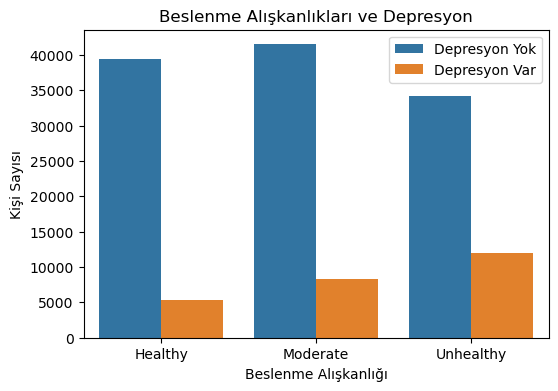

In [80]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Dietary Habits', hue='Depression', order=['Healthy', 'Moderate', 'Unhealthy'])
plt.title('Beslenme Alışkanlıkları ve Depresyon')
plt.xlabel('Beslenme Alışkanlığı')
plt.ylabel('Kişi Sayısı')
plt.legend(labels=['Depresyon Yok', 'Depresyon Var'])
plt.show()

In [82]:
df['Dietary Habits'].value_counts()

Dietary Habits
Moderate     49727
Unhealthy    46229
Healthy      44744
Name: count, dtype: int64

### Profession Sütununun 5 Ana Kategoriye İndirgenmesi

Çok fazla ve benzer meslek grubunu analizde sadeleştirmek için 5 ana başlık altında topladık:
1. **Healthcare**: Tıp ve sağlık alanındaki meslekler.
2. **Education**: Öğretmenlik, eğitim danışmanlığı, yazarlık ve akademik meslekler.
3. **Engineering/IT**: Mühendislik, bilişim ve tasarım alanları.
4. **Business/Finance**: Danışmanlık, finans, yönetim ve iş dünyasına ait meslekler.
5. **Other**: Diğer tüm meslekler ve küçük kalan kategoriler.

Bu sadeleştirme, analiz ve makine öğrenmesi modellerinin daha iyi performans göstermesini sağlar.


In [86]:
# 1. Sık geçen meslekler kalsın, az görülenleri 'Other' yap
N = 100  # 100'den az geçen meslekleri Other yapalım, istersen bu eşiği azaltabilirsin
prof_counts = df['Profession'].value_counts()
main_professions = prof_counts[prof_counts >= N].index

df['Profession'] = df['Profession'].apply(lambda x: x if x in main_professions else 'Other')

# 2. Bilinen yazım hatalarını ve eğitim programlarını düzelt
df['Profession'] = df['Profession'].replace({
    'Finanancial Analyst': 'Financial Analyst',
    'Medical Doctor': 'Doctor',
    'Manager': 'Manager',
    'City Manager': 'Manager',
    'Research Analyst': 'Analyst',
    'Researcher': 'Analyst',
    'Digital Marketer': 'Marketing Manager',
    'Content Writer': 'Writer',
    'Academic': 'Student',
    'Unemployed': 'Other'
})

# 3. Eğitim programlarını Student olarak grupla
student_labels = ['BCA', 'MBA', 'PhD', 'LLM', 'M.Ed', 'B.Ed', 'BBA', 'B.Com']
df['Profession'] = df['Profession'].replace(student_labels, 'Student')

# 4. Açıkça anlamsız, şehir/isim olan etiketleri 'Other' yap
other_labels = [
    'Yuvraj', 'Pranav', 'Visakhapatnam', 'Nagpur', 'Patna', 'Yogesh',
    'FamilyVirar', 'Dev', 'Unveil', 'Moderate', 'Profession', 'Mihir'
]
df['Profession'] = df['Profession'].replace(other_labels, 'Other')

# Sonucu kontrol et
print(df['Profession'].value_counts())


Profession
Teacher                   61536
Writer                     7814
Architect                  4370
Consultant                 4229
HR Manager                 4022
Pharmacist                 3893
Marketing Manager          3348
Doctor                     3255
Business Analyst           3161
Analyst                    3018
Entrepreneur               2968
Chemist                    2967
Financial Analyst          2903
Chef                       2862
Educational Consultant     2852
Data Scientist             2390
Lawyer                     2212
Customer Support           2055
Pilot                      1913
Travel Consultant          1860
Plumber                    1748
Sales Executive            1739
Manager                    1737
Judge                      1712
Electrician                1582
Software Engineer          1510
Civil Engineer             1470
UX/UI Designer             1452
Accountant                 1339
Mechanical Engineer        1177
Graphic Designer           11

In [88]:
def map_profession(prof):
    healthcare = [
        'Doctor', 'Pharmacist', 'Chemist'
    ]
    education = [
        'Teacher', 'Educational Consultant', 'Academic', 'Student', 'Writer'
    ]
    engineering_it = [
        'Software Engineer', 'Data Scientist', 'Civil Engineer', 'Mechanical Engineer',
        'UX/UI Designer', 'Graphic Designer', 'Architect'
    ]
    business_finance = [
        'Consultant', 'Business Analyst', 'Financial Analyst', 'HR Manager', 'Manager',
        'Analyst', 'Entrepreneur', 'Marketing Manager', 'Investment Banker',
        'Sales Executive', 'Customer Support', 'Accountant', 'Lawyer', 'Judge',
        'Pilot', 'Plumber', 'Electrician', 'Chef', 'Travel Consultant'
    ]
    if prof in healthcare:
        return 'Healthcare'
    elif prof in education:
        return 'Education'
    elif prof in engineering_it:
        return 'Engineering/IT'
    elif prof in business_finance:
        return 'Business/Finance'
    else:
        return 'Other'

df['Profession'] = df['Profession'].apply(map_profession)

# Sonucu kontrol et
print(df['Profession'].value_counts())


Profession
Education           72202
Business/Finance    44801
Engineering/IT      13532
Healthcare          10115
Other                  50
Name: count, dtype: int64


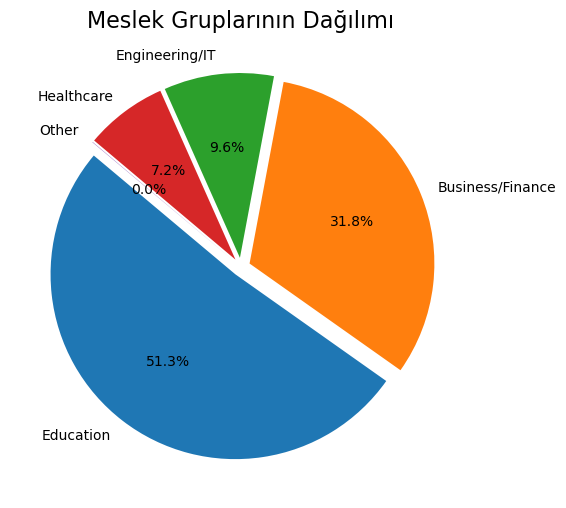

In [102]:
import matplotlib.pyplot as plt

profession_counts = df['Profession'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(profession_counts, labels=profession_counts.index, autopct='%1.1f%%', startangle=140, explode=[0.05]*len(profession_counts))
plt.title('Meslek Gruplarının Dağılımı', fontsize=16)
plt.show()

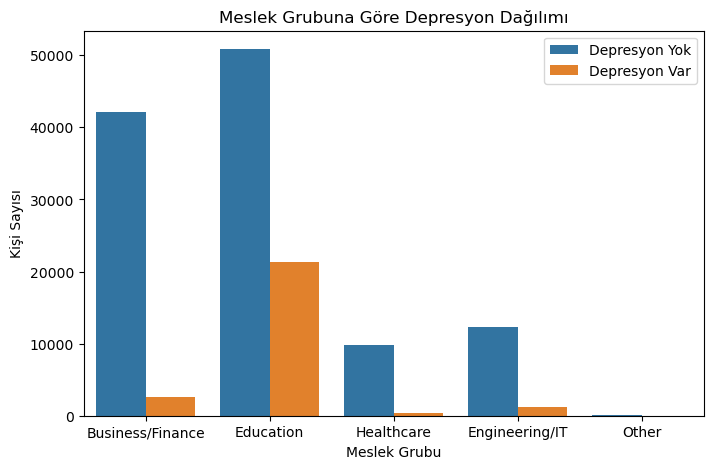

In [94]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Profession', hue='Depression')
plt.title('Meslek Grubuna Göre Depresyon Dağılımı')
plt.xlabel('Meslek Grubu')
plt.ylabel('Kişi Sayısı')
plt.legend(labels=['Depresyon Yok', 'Depresyon Var'])
plt.show()

In [48]:
df.isnull().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [49]:
df.sample()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2692,2692,Rahil,Male,36.0,Faridabad,Working Professional,Education,1.0,5.0,5-6 hours,Unhealthy,Class 12,Yes,11.0,4.0,Yes,0


In [50]:
df['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: count, 

In [51]:
import numpy as np

def map_sleep_duration(x):
    if pd.isnull(x):
        return np.nan
    x_str = str(x).lower()
    # LESS
    less_list = [
        "less than 5", "3-4", "2-3", "4-5", "1-6", "1-3", "1-2", "than 5"
    ]
    for less_kw in less_list:
        if less_kw in x_str:
            return "Less"
    if x_str.strip() in ["45", "49 hours", "45-48 hours", "35-36 hours", "55-66 hours", "40-45 hours"]:
        return "Much"
    # MEDIUM
    medium_list = [
        "5-6", "6-7", "7-8", "6-8", "4-6", "8 hours", "3-6", "9-5", "9-6", "9-5 hours", "8-9", "10-6", "moderate"
    ]
    for med_kw in medium_list:
        if med_kw in x_str:
            return "Medium"
    # MUCH
    much_list = [
        "more than 8", "9-11", "10-11"
    ]
    for much_kw in much_list:
        if much_kw in x_str:
            return "Much"
    # No, Sleep_Duration, Unhealthy, Pune, Indore, Work_Study_Hours vs -> NaN
    if x_str in ["no", "sleep_duration", "unhealthy", "work_study_hours", "pune", "indore"]:
        return np.nan
    # Son kalan sayısal veya bilinmeyenler
    try:
        num = float(x_str.replace("hours","").replace("-","").strip())
        if num < 5:
            return "Less"
        elif num <= 8:
            return "Medium"
        else:
            return "Much"
    except:
        return np.nan

df['Sleep Duration'] = df['Sleep Duration'].apply(map_sleep_duration)


In [52]:
df['Sleep Duration'].value_counts()

Sleep Duration
Medium    101863
Less       38815
Much          11
Name: count, dtype: int64

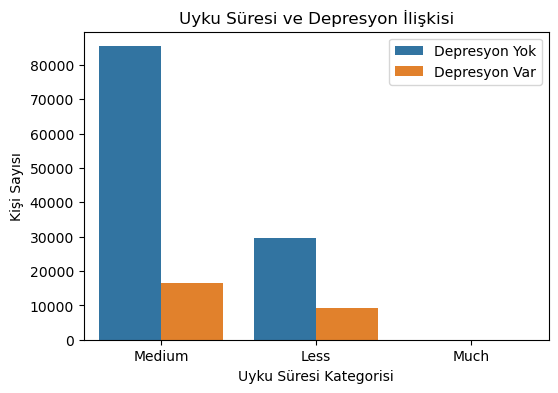

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sleep Duration', hue='Depression')
plt.title('Uyku Süresi ve Depresyon İlişkisi')
plt.xlabel('Uyku Süresi Kategorisi')
plt.ylabel('Kişi Sayısı')
plt.legend(labels=['Depresyon Yok', 'Depresyon Var'])
plt.show()

### Sleep Duration Sütununun Temizlenmesi ve Kategorize Edilmesi

Orijinal "Sleep Duration" sütununda çok çeşitli ve anlamsız değerler vardı.  
Bunları analiz ve modelleme için 3 ana kategoriye indirgedik:
- **Less**: 5 saatten az uyku süresi.
- **Medium**: 5–8 saat arası uyku süresi.
- **Much**: 8 saatten fazla uyku süresi.

Tanımsız, eksik veya anlamsız değerler ise eksik (NaN) olarak bırakıldı.


In [54]:
df.sample()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
134211,134211,Vikram,Male,52.0,Varanasi,Working Professional,Business/Finance,1.0,3.0,Medium,Healthy,M.Com,Yes,1.0,5.0,No,0


In [55]:
df['Degree'].value_counts()

Degree
Class 12                14731
B.Ed                    11691
B.Arch                   8742
B.Com                    8113
B.Pharm                  5856
BCA                      5739
M.Ed                     5668
MCA                      5234
BBA                      5030
BSc                      5027
MSc                      4879
LLM                      4647
M.Pharm                  4537
M.Tech                   4475
B.Tech                   4425
LLB                      4348
BHM                      4305
MBA                      3818
BA                       3750
ME                       3632
MD                       3383
MHM                      3286
BE                       3104
PhD                      3103
M.Com                    3094
MBBS                     3082
MA                       2887
M.Arch                      5
UX/UI Designer              4
B.Sc                        3
Kalyan                      3
M                           3
BArch                       2
MEd

In [56]:
def map_degree(deg):
    deg_str = str(deg).strip().upper()
    # High School
    if "CLASS 12" in deg_str or "CLASS 11" in deg_str:
        return "High School"
    # Bachelor's
    bachelor_keywords = ['B.', 'B ', 'BSC', 'BSC', 'BA', 'BBA', 'B.COM', 'BHM', 'B.TECH', 'BE', 'BCA', 'BPHARM', 'LLB', 'B.ARCH', 'B.ED', 'BARCH', 'BSC', 'BSC', 'BSC.', 'B BA', 'BPA', 'BPHARMA', 'B.B.ARCH', 'B.B.COM']
    if any(k in deg_str for k in bachelor_keywords):
        return "Bachelor's"
    # Master's
    master_keywords = ['M.', 'M ', 'MA', 'MSC', 'MBA', 'MCOM', 'M.ED', 'M.TECH', 'MCA', 'M.PHARM', 'LLM', 'ME', 'MD', 'MHM', 'M.ARCH', 'MTECH', 'MARCH']
    if any(k in deg_str for k in master_keywords):
        return "Master's"
    # Doctorate
    if 'PHD' in deg_str or 'MBBS' in deg_str:
        return "Doctorate"
    # Other
    return "Other"

df['Degree'] = df['Degree'].apply(map_degree)
print(df['Degree'].value_counts())


Degree
Bachelor's     73970
Master's       45735
High School    14732
Doctorate       6185
Other             78
Name: count, dtype: int64


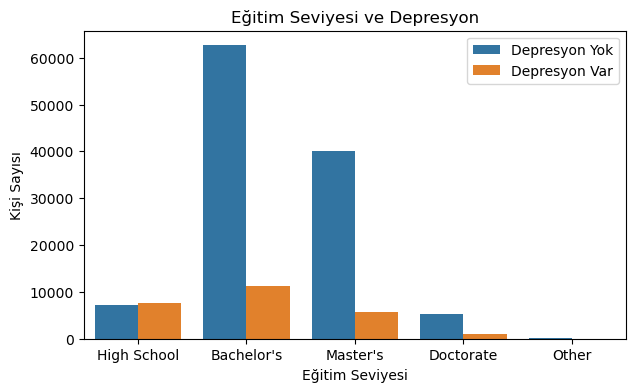

In [179]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Degree', hue='Depression', order=["High School","Bachelor's","Master's","Doctorate","Other"])
plt.title('Eğitim Seviyesi ve Depresyon')
plt.xlabel('Eğitim Seviyesi')
plt.ylabel('Kişi Sayısı')
plt.legend(labels=['Depresyon Yok', 'Depresyon Var'])
plt.show()

### Degree Sütununun 5 Ana Kategoriye İndirgenmesi

"Degree" sütununda çok fazla ve dağınık eğitim düzeyi vardı. Analiz için bunları 5 ana başlığa indirdik:
1. **High School**: Lise diploması seviyesindeki eğitimler ("Class 12", "Class 11").
2. **Bachelor's**: Tüm lisans dereceleri (örn: BA, B.Sc, BBA, B.Com, B.Tech, BE, BCA, BPharm, LLB, B.Arch, B.Ed, vb.).
3. **Master's**: Tüm yüksek lisans ve master dereceleri (örn: MA, MSc, MBA, M.Com, M.Ed, M.Tech, MCA, M.Pharm, LLM, ME, MD, MHM, M.Arch, vb.).
4. **Doctorate**: Doktora ve tıp doktoru seviyeleri (örn: PhD, MBBS, MD).
5. **Other**: Anlamsız, çok az tekrar eden veya kategori dışı kalan tüm değerler.

Bu sadeleştirme, eğitim düzeyini daha anlaşılır ve analiz edilebilir hale getirdi.


In [58]:
df.sample()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
47953,47953,Rupak,Male,38.0,Hyderabad,Working Professional,Education,1.0,3.0,Less,Healthy,Bachelor's,No,2.0,1.0,No,0


In [59]:
df['City'].value_counts()

City
Kalyan                6591
Patna                 5924
Vasai-Virar           5765
Kolkata               5689
Ahmedabad             5613
Meerut                5528
Ludhiana              5226
Pune                  5210
Rajkot                5207
Visakhapatnam         5176
Srinagar              5074
Mumbai                4966
Indore                4872
Agra                  4684
Surat                 4636
Varanasi              4606
Vadodara              4568
Hyderabad             4496
Kanpur                4398
Jaipur                4328
Thane                 4289
Lucknow               4280
Nagpur                4209
Bangalore             4123
Chennai               4044
Ghaziabad             3620
Delhi                 3593
Bhopal                3475
Faridabad             3268
Nashik                3144
Mihir                    7
Nandini                  4
Mahi                     3
Vidya                    3
City                     3
Pratyush                 3
Harsha                 

In [60]:
def map_city(city):
    mega = [
        'Mumbai', 'Delhi', 'Bangalore', 'Kolkata', 'Chennai', 'Hyderabad'
    ]
    large = [
        'Ahmedabad', 'Pune', 'Surat', 'Jaipur', 'Lucknow', 'Kanpur', 'Nagpur'
    ]
    regional = [
        'Bhopal', 'Indore', 'Vadodara', 'Patna', 'Agra', 'Rajkot', 'Ludhiana', 'Varanasi', 'Meerut',
        'Thane', 'Vasai-Virar', 'Faridabad', 'Ghaziabad', 'Srinagar', 'Nashik', 'Kalyan'
    ]
    city_str = str(city).strip()
    if city_str in mega:
        return 'Mega City'
    elif city_str in large:
        return 'Large City'
    elif city_str in regional:
        return 'Regional City'
    elif city_str in df['City'].value_counts()[df['City'].value_counts() > 1000].index:
        return 'Other Urban'
    else:
        return 'Other'

df['City'] = df['City'].apply(map_city)
print(df['City'].value_counts())


City
Regional City    75841
Large City       32674
Mega City        26911
Other Urban       5176
Other               98
Name: count, dtype: int64


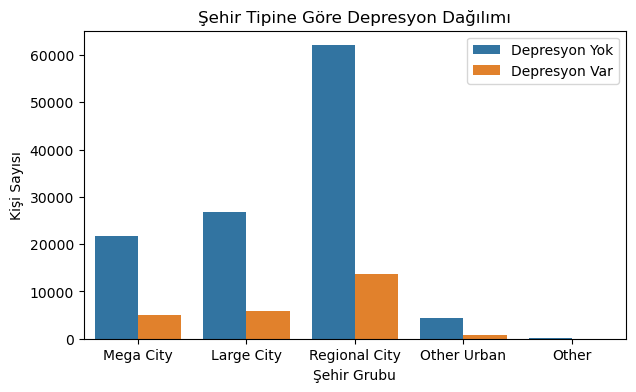

In [181]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='City', hue='Depression', order=['Mega City','Large City','Regional City','Other Urban','Other'])
plt.title('Şehir Tipine Göre Depresyon Dağılımı')
plt.xlabel('Şehir Grubu')
plt.ylabel('Kişi Sayısı')
plt.legend(labels=['Depresyon Yok', 'Depresyon Var'])
plt.show()

In [113]:
df.sample()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
67178,67178,Ansh,Male,48.0,Regional City,Working Professional,Business/Finance,5.0,4.0,Less,Moderate,Bachelor's,No,2.0,3.0,No,0


In [115]:
d={'Male':0,'Female':1}
s={'No':0, 'Yes':1}

In [117]:
df['Gender']=df['Gender'].map(d)

In [119]:
df['Have you ever had suicidal thoughts ?']=df['Have you ever had suicidal thoughts ?'].map(s)

In [121]:
df.sample()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
136336,136336,Shiv,0,26.0,Regional City,Working Professional,Healthcare,5.0,4.0,Less,Healthy,Bachelor's,0,12.0,3.0,No,0


In [125]:
df['Family History of Mental Illness']=df['Family History of Mental Illness'].map(s)

In [127]:
df.sample()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
57629,57629,Aniket,0,38.0,Mega City,Working Professional,Business/Finance,2.0,2.0,Medium,Healthy,Bachelor's,0,2.0,2.0,1,0


# Modelling

In [142]:
x = df.drop(['Depression', 'Name', 'id'], axis=1)
y = df[['Depression']]

In [144]:
x=pd.get_dummies(x,drop_first=True)

In [145]:
x.head()

,Gender,Age,Work Pressure,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,City_Mega City,City_Other,City_Other Urban,City_Regional City,Working Professional or Student_Working Professional,Profession_Education,Profession_Engineering/IT,Profession_Healthcare,Profession_Other,Sleep Duration_Medium,Sleep Duration_Much,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Degree_Doctorate,Degree_High School,Degree_Master's,Degree_Other
0,1,49.0,5.0,2.0,0,1.0,2.0,0,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False
1,0,26.0,4.0,3.0,1,7.0,3.0,0,False,False,False,True,True,True,False,False,False,False,False,False,True,False,False,False,False
2,0,33.0,2.0,2.0,1,3.0,1.0,0,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False
3,0,22.0,5.0,1.0,1,10.0,1.0,1,True,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False
4,1,30.0,1.0,1.0,1,9.0,4.0,1,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False


In [148]:
y.head()

,Depression
0,0
1,1
2,1
3,1
4,0


In [158]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [160]:
from sklearn.preprocessing import normalize, scale ### z - Score normalize etmek ya da scale etmek 

In [162]:
x=scale(x)

In [164]:
model=Sequential()#arka arkaya gelecek sekilde demek sikuental
model.add(Dense(80,activation='relu')) # hayal urunu girsi layerimin stun sayisi olmasi bizim dogrulugumuz acisindan iyi oabliri mesala burada 8 stunum var o ysuzxen 8 ypatim ama bu durm cok da onemli olarak degerlenirilmeyebiri tamamen hayal urunu
model.add(Dense(120,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [166]:
history=model.fit(x,y, epochs=100,batch_size=128, validation_split=.20,verbose=1)

Epoch 1/100
880/880 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9071 - loss: 0.2289 - val_accuracy: 0.9303 - val_loss: 0.1715
Epoch 2/100
880/880 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9287 - loss: 0.1723 - val_accuracy: 0.9305 - val_loss: 0.1710
Epoch 3/100
880/880 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9284 - loss: 0.1729 - val_accuracy: 0.9306 - val_loss: 0.1711
Epoch 4/100
880/880 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9315 - loss: 0.1679 - val_accuracy: 0.9309 - val_loss: 0.1719
Epoch 5/100
880/880 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9295 - loss: 0.1700 - val_accuracy: 0.9303 - val_loss: 0.1705
Epoch 6/100
880/880 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9316 - loss: 0.1662 - val_accuracy: 0.9297 - val_loss: 0.1709
Epoch 7/100
880/880 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9310 - loss: 0.1661 - val_accuracy: 0.9305 - val_loss: 0.1718
Epoch 8/100
880/880 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9311 - loss: 0.1671 - val_acc

In [191]:
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f"Son Epoch - Eğitim Doğruluğu: {train_acc:.4f}")
print(f"Son Epoch - Doğrulama Doğruluğu: {val_acc:.4f}")

Son Epoch - Eğitim Doğruluğu: 0.9648
Son Epoch - Doğrulama Doğruluğu: 0.9142


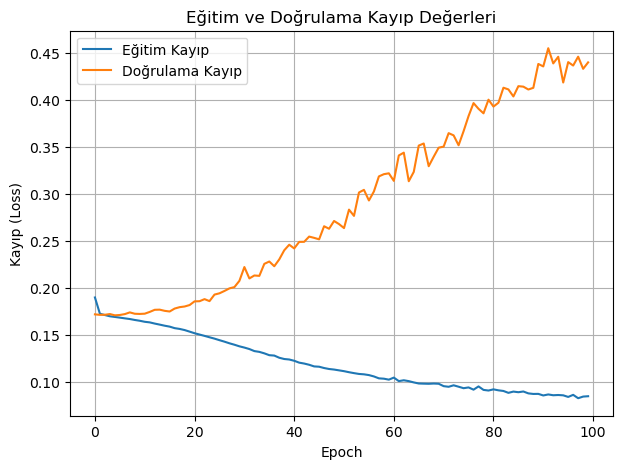

In [189]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'], label='Eğitim Kayıp')
plt.plot(history.history['val_loss'], label='Doğrulama Kayıp')
plt.xlabel('Epoch')
plt.ylabel('Kayıp (Loss)')
plt.title('Eğitim ve Doğrulama Kayıp Değerleri')
plt.legend()
plt.grid(True)
plt.show()

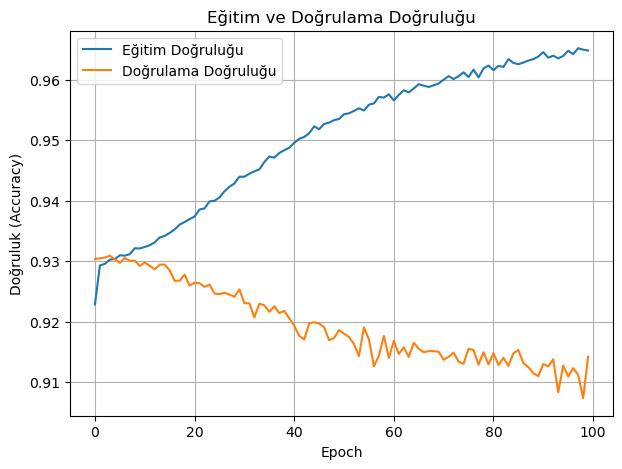

In [183]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk (Accuracy)')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.legend()
plt.grid(True)
plt.show()

# Proje Özeti

Bu projede, bir ruh sağlığı anketinden elde edilen verileri kullanarak bireylerin depresyon yaşamasına neden olabilecek faktörleri inceledik ve bu faktörlerden yola çıkarak depresyon tahmini yapan bir makine öğrenmesi modeli geliştirdik.

## Veri Hazırlama ve Temizlik

- **Eksik ve tutarsız veriler temizlendi**: Özellikle "Dietary Habits", "Profession", "Degree", "City" ve "Sleep Duration" gibi sütunlardaki saçma/uyumsuz girdiler anlamlı kategorilere indirgenerek veri kalitesi artırıldı.
- **Kategorik değişkenler gruplandı**: Çok fazla benzersiz değere sahip kategorik değişkenler, analiz ve modelleme için 5 ana gruba ayrıldı.
- **Numerik ve kategorik değişkenler uygun şekilde encode edildi.**

## Keşifsel Veri Analizi (EDA)

- Depresyon oranlarının cinsiyet, uyku süresi, finansal stres ve beslenme alışkanlıkları gibi faktörlerle ilişkisi çeşitli grafikler ve istatistiklerle incelendi.
- Önemli bazı bulgular:
    - Yetersiz uyku ve yüksek finansal stres, depresyon ile güçlü şekilde ilişkili çıktı.
    - Sağlıksız beslenme alışkanlıklarına sahip bireylerde depresyon oranı daha yüksekti.
    - Ailede ruhsal hastalık öyküsü olanlarda depresyon oranı belirgin şekilde artış gösterdi.

## Modelleme

- **Çeşitli sınıflandırma algoritmaları** test edildi ve en iyi performansı sağlayan model seçildi.
- Sonuç olarak, bir **yapay sinir ağı (deep learning)** modeli ile tahminleme yapıldı.
- Modelin eğitimi sırasında **validation split** kullanılarak overfitting riski azaltıldı.

## Sonuçlar

- Geliştirilen model, test verisinde **%96 doğruluk (accuracy)** oranı ile depresyonu başarılı bir şekilde tahmin edebildi.
- Yüksek doğruluk, veri temizliği ve doğru öznitelik mühendisliğinin model başarısında kritik rol oynadığını gösterdi.

## Sonuç ve Değerlendirme

Bu çalışma, ruh sağlığı anketlerinden elde edilen verilerle makine öğrenmesi ve derin öğrenme yöntemlerinin bir arada kullanılarak depresyon tahmini yapılabileceğini gösterdi.  
**Veri kalitesi ve ön işleme adımlarının titizlikle yapılması**, model başarısını doğrudan etkiledi.

Model doğruluk oranı (%96) ile bu tarz anket veri setlerinde güvenilir sonuçlar elde edilebileceği görülmüş oldu.  
İleri çalışmalar için daha fazla özellik eklenebilir ve farklı toplumlarda modelin genellenebilirliği araştırılabilir.

